In [3]:
#!pip install gradio torch clip transformers

In [ ]:
#!pip install git+https://github.com/openai/CLIP.git
#! pip install ftfy regex tqdm
# https://github.com/Stability-AI/stablediffusion/tree/main
# https://thepythoncode.com/article/generate-images-using-depth-to-image-huggingface-python
# https://huggingface.co/docs/diffusers/v0.15.0/en/api/pipelines/stable_diffusion/depth2img#diffusers.StableDiffusionDepth2ImgPipeline

In [2]:
gr.__version__

'4.31.0'

In [4]:
import torch
import requests
from PIL import Image
from diffusers import StableDiffusionDepth2ImgPipeline
import gradio as gr

# Load the model
pipe = StableDiffusionDepth2ImgPipeline.from_pretrained(
    "stabilityai/stable-diffusion-2-depth",
    torch_dtype=torch.float16,
)
pipe.to("cuda")

def customize_product(image_url, prompt, negative_prompt, strength=0.7):
    progress_text = "Downloading image..."
    
    # Download image
    init_image = Image.open(requests.get(image_url, stream=True).raw)
    progress_text += "\nImage downloaded. Generating customized image..."
    
    # Generate customized image
    result = pipe(prompt=prompt, init_image=init_image, negative_prompt=negative_prompt, strength=strength).images[0]
    
    temp_path = "/tmp/customized_product.png"
    result.save(temp_path)
    progress_text += "\nImage customization complete."
    
    return temp_path, progress_text

# Set up Gradio interface
iface = gr.Interface(
    fn=customize_product,
    inputs=[
        gr.components.Textbox(default="http://images.cocodataset.org/val2017/000000039769.jpg", label="Initial Image URL"),
        gr.components.Textbox(default="a futuristic cityscape", label="Positive Prompt"),
        gr.components.Textbox(default="blurry, poorly detailed", label="Negative Prompt"),
        gr.components.Slider(minimum=0, maximum=1, default=0.7, label="Strength of Transformation")
    ],
    outputs=[
        gr.components.Image(type="file", label="Customized Product"),
        gr.components.Textbox(label="Process Updates")
    ],
    title="Product Customization using AI",
    description="Enter the URL of a product image and describe your desired customizations. The AI will attempt to modify the image according to your specifications."
)

iface.launch()


KeyboardInterrupt: 

In [7]:
import torch
import requests
from PIL import Image
from diffusers import StableDiffusionDepth2ImgPipeline
import gradio as gr

# Load the model
from diffusers import DiffusionPipeline

pipe = DiffusionPipeline.from_pretrained("stabilityai/stable-diffusion-xl-base-1.0")
pipe.to("cpu")

def customize_product(image_url, prompt, negative_prompt, strength=0.7):
    progress_text = "Downloading image..."
    
    # Download image
    init_image = Image.open(requests.get(image_url, stream=True).raw)
    progress_text += "\nImage downloaded. Generating customized image..."
    
    # Generate customized image
    result = pipe(prompt=prompt, init_image=init_image, negative_prompt=negative_prompt, strength=strength).images[0]
    
    temp_path = "/image/customized_product.png"
    result.save(temp_path)
    progress_text += "\nImage customization complete."
    
    return temp_path, progress_text

# Set up Gradio interface
iface = gr.Interface(
    fn=customize_product,
    inputs=[
        gr.components.Textbox(label="Initial Image URL"),
        gr.components.Textbox(label="Positive Prompt"),
        gr.components.Textbox(label="Negative Prompt"),
        gr.components.Slider(minimum=0, maximum=1, label="Strength of Transformation")
    ],
    outputs=[
        gr.components.Image(type="filepath", label="Customized Product"),
        gr.components.Textbox(label="Process Updates")
    ],
    title="Product Customization using AI",
    description="Enter the URL of a product image and describe your desired customizations. The AI will attempt to modify the image according to your specifications."
)

iface.launch()


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


  0%|          | 0/50 [00:00<?, ?it/s]

In [ ]:
import torch
import requests
from PIL import Image
from diffusers import StableDiffusionDepth2ImgPipeline
import gradio as gr

# Load the model
from diffusers import DiffusionPipeline

pipe = DiffusionPipeline.from_pretrained("stabilityai/stable-diffusion-xl-base-1.0")
pipe.to("cpu")

def customize_product(image_url, prompt, negative_prompt, strength=0.7):
    progress_text = "Downloading image..."
    
    # Download image
    init_image = Image.open(requests.get(image_url, stream=True).raw)
    progress_text += "\nImage downloaded. Generating customized image..."
    
    # Generate customized image
    result = pipe(prompt=prompt, init_image=init_image, negative_prompt=negative_prompt, strength=strength).images[0]
    
    temp_path = "/image/customized_product.png"
    result.save(temp_path)
    progress_text += "\nImage customization complete."
    
    return temp_path, progress_text

# Set up Gradio interface
iface = gr.Interface(
    fn=customize_product,
    inputs=[
        gr.components.Textbox(label="Initial Image URL"),
        gr.components.Textbox(label="Positive Prompt"),
        gr.components.Textbox(label="Negative Prompt"),
        gr.components.Slider(minimum=0, maximum=1, label="Strength of Transformation")
    ],
    outputs=[
        gr.components.Image(type="filepath", label="Customized Product"),
        gr.components.Textbox(label="Process Updates")
    ],
    title="Product Customization using AI",
    description="Enter the URL of a product image and describe your desired customizations. The AI will attempt to modify the image according to your specifications."
)

iface.launch()


In [7]:
import gradio as gr
import torch
import clip
import numpy as np
from PIL import Image

# Load the CLIP model
device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load('ViT-B/32', device=device)

def product_customization(image, description):
    # Preprocess the image and prepare the text
    if isinstance(image, np.ndarray):
        image = Image.fromarray(image.astype('uint8'), 'RGB')
    elif isinstance(image, str):  # Assuming image could also be a filepath
        image = Image.open(image)
    image = preprocess(image).unsqueeze(0).to(device)
    text = clip.tokenize([description]).to(device)

    # Compute similarity scores between the image and the text
    with torch.no_grad():
        image_features = model.encode_image(image)
        text_features = model.encode_text(text)

    # Calculate cosine similarity
    similarity = (image_features @ text_features.T).squeeze().cpu().numpy()

    # Generate feedback based on similarity
    if similarity > 0.3:
        feedback = "Great match! Customizing product..."
    else:
        feedback = "Not a good match. Try adjusting your description."

    return feedback

# Define the interface
iface = gr.Interface(
    fn=product_customization,
    inputs=[gr.components.Image("editor"),
            gr.components.Textbox(lines=2,
            placeholder="Describe your custom product here...")],
    outputs="text",
    title="Interactive Product Customization",
    description="Upload an image of the product and describe how you want to customize it."
)

iface.launch()


Running on local URL:  http://127.0.0.1:7863

To create a public link, set `share=True` in `launch()`.


In [ ]:
!pip install invisible_watermark transformers accelerate safetensors


In [1]:
from diffusers import StableDiffusionPipeline

# Load the Stable Diffusion model
model = StableDiffusionPipeline.from_pretrained("CompVis/stable-diffusion-xl-base-1.0", 
                                                use_auth_token=True).to("cuda")

import gradio as gr

def product_customization(description):
    image_path, feedback = generate_image(description)
    return image_path, feedback

iface = gr.Interface(
    fn=product_customization,
    inputs=[gr.components.Textbox(lines=2, placeholder="Describe your custom product here...")],
    outputs=[gr.outputs.Image(type="file"), "text"],
    title="Generate Custom Products with AI",
    description="Enter a description of the product you envision, and the AI will generate an image based on it."
)

iface.launch()



KeyboardInterrupt: 

In [ ]:
import gradio as gr
from diffusers import StableDiffusionPipeline
from transformers import CLIPProcessor, CLIPModel
import torch

# Load Stable Diffusion
model_id = "CompVis/stable-diffusion-v1-4"
device = "cuda" if torch.cuda.is_available() else "cpu"
pipe = StableDiffusionPipeline.from_pretrained(model_id, revision="fp16", torch_dtype=torch.float16, use_auth_token=True)
pipe = pipe.to(device)

# Load CLIP for evaluating the match (optional)
clip_model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
clip_processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

def product_customization(image, description):
    # Use diffusion model to generate customized product
    prompt = f"A photo of a {description}"
    generated_image = pipe(prompt).images[0]
    
    # Check using CLIP how well the generated image matches the description (optional)
    inputs = clip_processor(text=[description], images=[generated_image], return_tensors="pt", padding=True)
    outputs = clip_model(**inputs)
    logits_per_image = outputs.logits_per_image  # this scores how well the image matches the text
    probs = logits_per_image.softmax(dim=1)
    match_score = probs[:, 0].item()
    
    feedback = f"Match score: {match_score:.2f}"
    
    return generated_image, feedback

# Define the interface
iface = gr.Interface(
    fn=product_customization,
    inputs=[gr.components.Image(tool="editor"), gr.components.Textbox(lines=2, placeholder="Describe the customization, e.g., 'bag with a new zip'")],
    outputs=["image", "text"],
    title="Interactive Product Customization with AI",
    description="Upload an image of the product and describe how you want to customize it using AI."
)

iface.launch()


In [ ]:
import gradio as gr
import requests

def call_diffusion_model(image, description):
    # Convert the PIL image to the format expected by the API
    image.save("/tmp/uploaded_image.png")
    files = {'image': open('/tmp/uploaded_image.png', 'rb')}
    data = {'prompt': description}
    
    # Example API call (hypothetical)
    response = requests.post("https://api.diffusionmodel.com/generate", files=files, data=data)
    if response.status_code == 200:
        new_image_path = "/tmp/generated_image.png"
        with open(new_image_path, "wb") as f:
            f.write(response.content)
        return new_image_path, "Image customized based on your description."
    else:
        return None, "Failed to generate image."

def product_customization(image, description):
    # Assuming the function above returns the path to the new image and feedback
    new_image_path, feedback = call_diffusion_model(image, description)
    return new_image_path, feedback

# Define the Gradio interface
iface = gr.Interface(
    fn=product_customization,
    inputs=[gr.components.Image(tool="editor"), gr.components.Textbox(lines=2, placeholder="Describe your custom product here...")],
    outputs=[gr.outputs.Image(type="file"), "text"],
    title="Product Customization with AI",
    description="Upload an image of the product and describe how you want to customize it. The AI will generate a new image based on your description."
)

iface.launch()


In [14]:
import os
os.getcwd()

'/Users/fredbone/Library/Mobile Documents/com~apple~CloudDocs/Maketribe'

In [16]:
os.listdir('/Users/fredbone/Library/Mobile Documents/com~apple~CloudDocs/Maketribe/images')

['woman_bag.png']

In [18]:
image_url

NameError: name 'image_url' is not defined

In [19]:
from openai import OpenAI
client = OpenAI()

response = client.images.create_variation(
  model="dall-e-2",
  image=open("images/woman_bag.png", "rb"),
  n=1,
  size="1024x1024"
)

image_url = response.data[0].url

BadRequestError: Error code: 400 - {'error': {'code': 'billing_hard_limit_reached', 'message': 'Billing hard limit has been reached', 'param': None, 'type': 'invalid_request_error'}}

In [17]:
from openai import OpenAI
client = OpenAI()

response = client.images.create_variation(
  model="dall-e-2",
  image=open("images/woman_bag.png", "rb"),
  n=1,
  size="1024x1024"
)

image_url = response.data[0].url

python(31502) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


BadRequestError: Error code: 400 - {'error': {'code': 'billing_hard_limit_reached', 'message': 'Billing hard limit has been reached', 'param': None, 'type': 'invalid_request_error'}}

In [15]:
from openai import OpenAI
client = OpenAI()

response = client.images.edit(
  model = "dall-e-2",
  image = open("/images/woman_bag.png", "rb"),
  prompt = "A sunlit indoor lounge area with a pool containing a flamingo",
  n = 1,
  size = "1024x1024"
)
image_url = response.data[0].url

FileNotFoundError: [Errno 2] No such file or directory: '/images/woman_bag.png'

In [11]:
from openai import OpenAI
client = OpenAI()

In [4]:
import torch
from tqdm.notebook import tqdm
from diffusers import StableDiffusionPipeline

# Define model_id and device
model_id = "CompVis/stable-diffusion-v1-4"
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [6]:
import torch
from tqdm.notebook import tqdm
from diffusers import StableDiffusionPipeline

# Define model_id and device
model_id = "CompVis/stable-diffusion-v1-4"
device = "cuda" if torch.cuda.is_available() else "cpu"
# Use GPU on Mac M1
device = torch.device('mps')

# Load the model with progress tracking
with tqdm(total=100, desc="Loading Model") as pbar:
    pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
    pbar.update(50)
    pipe = pipe.to(device)
    pbar.update(25)
    pipe.enable_attention_slicing()
    pbar.update(25)

# Define the prompt
prompt = "a photo of an astronaut riding a horse on mars"

# Generate the image with progress tracking
with tqdm(total=100, desc="Generating Image") as pbar:
    image = pipe(prompt).images[0]
    pbar.update(100)

# Save the image
image.save("astronaut_rides_horse.png")
print("Image saved as astronaut_rides_horse.png")


Loading Model:   0%|          | 0/100 [00:00<?, ?it/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Generating Image:   0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

/opt/miniconda3/envs/py_3_9_17/lib/python3.9/site-packages/diffusers/image_processor.py:92: RuntimeWarning: invalid value encountered in cast
  images = (images * 255).round().astype("uint8")
Potential NSFW content was detected in one or more images. A black image will be returned instead. Try again with a different prompt and/or seed.


Image saved as astronaut_rides_horse.png


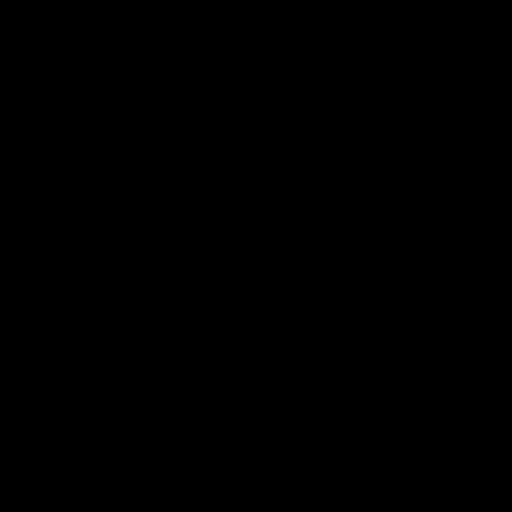

In [7]:
image

In [8]:
import gradio as gr
from diffusers import StableDiffusionPipeline
import torch
from PIL import Image
import random

# Load the pre-trained Stable Diffusion model
model_id = "CompVis/stable-diffusion-v1-4"
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
# device = "cuda" if torch.cuda.is_available() else "cpu"
# Use GPU on Mac M1
device = torch.device('mps')
print(f'device: {device}')
pipe = pipe.to(device)

def generate_variation(images, prompt):
    # Select one image as a base (Stable Diffusion doesn't support image input directly)
    selected_image = random.choice(images)
    
    # Convert the selected image to a tensor
    selected_image = selected_image.convert("RGB")
    selected_image = selected_image.resize((512, 512))
    selected_image = torch.tensor(selected_image).permute(2, 0, 1).unsqueeze(0).to("cuda").float() / 255.0

    # Generate a variation based on the prompt
    generated_image = pipe(prompt=prompt, init_image=selected_image, strength=0.75).images[0]

    return generated_image, f"New product variation based on prompt: {prompt}"

# Create Gradio interface
def create_app():
    with gr.Blocks() as app:
        gr.Markdown("# Artisan Product Variation Generator")
        
        with gr.Row():
            img1 = gr.Image(label="Upload Image 1")
            img2 = gr.Image(label="Upload Image 2")
            img3 = gr.Image(label="Upload Image 3")
            img4 = gr.Image(label="Upload Image 4")
            img5 = gr.Image(label="Upload Image 5")
        
        prompt = gr.Textbox(label="Describe the new product variation")
        
        output_image = gr.Image(label="Generated Product Variation")
        output_text = gr.Textbox(label="Description")
        
        def process(images, prompt):
            # Filter out None values (unselected images)
            filtered_images = [img for img in images if img is not None]
            
            # Ensure at least 3 images are selected
            if len(filtered_images) < 3:
                return None, "Please upload at least 3 images."
            
            return generate_variation(filtered_images, prompt)
        
        submit_button = gr.Button("Generate Variation")
        submit_button.click(
            process,
            inputs=[img1, img2, img3, img4, img5, prompt],
            outputs=[output_image, output_text]
        )
        
    return app

app = create_app()
app.launch()


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

device: mps


/opt/miniconda3/envs/py_3_9_17/lib/python3.9/site-packages/gradio/utils.py:977: UserWarning: Expected 2 arguments for function <function create_app.<locals>.process at 0x47790ba60>, received 6.
  warnings.warn(
/opt/miniconda3/envs/py_3_9_17/lib/python3.9/site-packages/gradio/utils.py:985: UserWarning: Expected maximum 2 arguments for function <function create_app.<locals>.process at 0x47790ba60>, received 6.
  warnings.warn(


Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


Traceback (most recent call last):
  File "/opt/miniconda3/envs/py_3_9_17/lib/python3.9/site-packages/gradio/queueing.py", line 527, in process_events
    response = await route_utils.call_process_api(
  File "/opt/miniconda3/envs/py_3_9_17/lib/python3.9/site-packages/gradio/route_utils.py", line 270, in call_process_api
    output = await app.get_blocks().process_api(
  File "/opt/miniconda3/envs/py_3_9_17/lib/python3.9/site-packages/gradio/blocks.py", line 1887, in process_api
    result = await self.call_function(
  File "/opt/miniconda3/envs/py_3_9_17/lib/python3.9/site-packages/gradio/blocks.py", line 1472, in call_function
    prediction = await anyio.to_thread.run_sync(
  File "/opt/miniconda3/envs/py_3_9_17/lib/python3.9/site-packages/anyio/to_thread.py", line 56, in run_sync
    return await get_async_backend().run_sync_in_worker_thread(
  File "/opt/miniconda3/envs/py_3_9_17/lib/python3.9/site-packages/anyio/_backends/_asyncio.py", line 2134, in run_sync_in_worker_thread
    

In [1]:
import gradio as gr
from diffusers import StableDiffusionPipeline
import torch
from PIL import Image
import random
import numpy as np

# Load the pre-trained Stable Diffusion model
model_id = "CompVis/stable-diffusion-v1-4"
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
# Use GPU on Mac M1
device = torch.device('mps')
print(f'device: {device}')
pipe = pipe.to(device)

def generate_variation(images, prompt):
    # Select one image as a base (Stable Diffusion doesn't support image input directly)
    selected_image = random.choice(images)
    
    # Ensure selected_image is a PIL Image
    if isinstance(selected_image, np.ndarray):
        selected_image = Image.fromarray(selected_image)
    
    selected_image = selected_image.convert("RGB")
    selected_image = selected_image.resize((512, 512))
    
    # Convert the selected image to a tensor
    selected_image_tensor = torch.tensor(np.array(selected_image)).permute(2, 0, 1).unsqueeze(0).to(device).float() / 255.0

    # Generate a variation based on the prompt
    generated_image = pipe(prompt=prompt, init_image=selected_image_tensor, strength=0.75).images[0]

    return generated_image, f"New product variation based on prompt: {prompt}"

# Create Gradio interface
def create_app():
    with gr.Blocks() as app:
        gr.Markdown("# Artisan Product Variation Generator")
        
        with gr.Row():
            img1 = gr.Image(label="Upload Image 1")
            img2 = gr.Image(label="Upload Image 2")
            img3 = gr.Image(label="Upload Image 3")
            img4 = gr.Image(label="Upload Image 4")
            img5 = gr.Image(label="Upload Image 5")
        
        prompt = gr.Textbox(label="Describe the new product variation")
        
        output_image = gr.Image(label="Generated Product Variation")
        output_text = gr.Textbox(label="Description")
        
        def process(img1, img2, img3, img4, img5, prompt):
            # Filter out None values (unselected images)
            images = [img1, img2, img3, img4, img5]
            filtered_images = [img for img in images if img is not None]
            
            # Ensure at least 3 images are selected
            if len(filtered_images) < 3:
                return None, "Please upload at least 3 images."
            
            return generate_variation(filtered_images, prompt)
        
        submit_button = gr.Button("Generate Variation")
        submit_button.click(
            process,
            inputs=[img1, img2, img3, img4, img5, prompt],
            outputs=[output_image, output_text]
        )
        
    return app

app = create_app()
app.launch()


/opt/miniconda3/envs/py_3_9_17/lib/python3.9/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

device: mps
Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


In [1]:
import os
from dotenv import load_dotenv,find_dotenv
load_dotenv(find_dotenv())

OpenAI_key = os.environ.get('OPENAI_API_KEY')
print(OpenAI_token)

NameError: name 'OpenAI_token' is not defined

In [5]:
# old
import os
import openai

from dotenv import load_dotenv, find_dotenv
_ = load_dotenv(find_dotenv()) # read local .env file
openai.api_key = os.environ['OPENAI_API_KEY']

In [3]:
# new
from openai import OpenAI

client = OpenAI(
  api_key=os.environ['OPENAI_API_KEY'],  # this is also the default, it can be omitted
)

In [ ]:
the new bag should have a green color and look more sophisticated

In [8]:
import gradio as gr
import openai
from PIL import Image
import random
import io
import os
import numpy as np
from dotenv import load_dotenv, find_dotenv
import requests

from openai import OpenAI

client = OpenAI(
  api_key=os.environ['OPENAI_API_KEY'],  # this is also the default, it can be omitted
)

# Function to generate new product variation using DALL-E
def generate_variation(images, prompt):
    # Convert numpy.ndarray images to PIL images and then to bytes for OpenAI API
    image_bytes = []
    for image in images:
        if isinstance(image, np.ndarray):
            image = Image.fromarray(image)
        img_byte_arr = io.BytesIO()
        image.save(img_byte_arr, format='PNG')
        img_byte_arr = img_byte_arr.getvalue()
        image_bytes.append(img_byte_arr)
    
    # Select one image as a base
    selected_image = random.choice(image_bytes)
    
    # Save the selected image to a temporary file
    temp_image_path = "temp_image.png"
    with open(temp_image_path, "wb") as temp_image_file:
        temp_image_file.write(selected_image)
    
    # Call OpenAI API to generate a variation
    response = client.images.edit(
        image=open(temp_image_path, "rb"),
        prompt=prompt,
        n=1,
        size="1024x1024"
    )
    
    # Extract image data from response
    image_url = response['data'][0]['url']
    
    # Load image data from the URL
    image_response = requests.get(image_url)
    generated_image = Image.open(io.BytesIO(image_response.content))
    
    return generated_image, f"New product variation based on prompt: {prompt}"

# Create Gradio interface
def create_app():
    with gr.Blocks() as app:
        gr.Markdown("# Artisan Product Variation Generator")
        
        with gr.Row():
            img1 = gr.Image(label="Upload Image 1")
            img2 = gr.Image(label="Upload Image 2")
            img3 = gr.Image(label="Upload Image 3")
            img4 = gr.Image(label="Upload Image 4")
            img5 = gr.Image(label="Upload Image 5")
        
        prompt = gr.Textbox(label="Describe the new product variation")
        
        output_image = gr.Image(label="Generated Product Variation")
        output_text = gr.Textbox(label="Description")
        
        def process(img1, img2, img3, img4, img5, prompt):
            # Filter out None values (unselected images)
            images = [img1, img2, img3, img4, img5]
            filtered_images = [img for img in images if img is not None]
            
            # Ensure at least 3 images are selected
            if len(filtered_images) < 3:
                return None, "Please upload at least 3 images."
            
            return generate_variation(filtered_images, prompt)
        
        submit_button = gr.Button("Generate Variation")
        submit_button.click(
            process,
            inputs=[img1, img2, img3, img4, img5, prompt],
            outputs=[output_image, output_text]
        )
        
    return app

app = create_app()
app.launch()


Running on local URL:  http://127.0.0.1:7861

To create a public link, set `share=True` in `launch()`.


Traceback (most recent call last):
  File "/opt/miniconda3/envs/py_3_9_17/lib/python3.9/site-packages/gradio/queueing.py", line 527, in process_events
    response = await route_utils.call_process_api(
  File "/opt/miniconda3/envs/py_3_9_17/lib/python3.9/site-packages/gradio/route_utils.py", line 270, in call_process_api
    output = await app.get_blocks().process_api(
  File "/opt/miniconda3/envs/py_3_9_17/lib/python3.9/site-packages/gradio/blocks.py", line 1887, in process_api
    result = await self.call_function(
  File "/opt/miniconda3/envs/py_3_9_17/lib/python3.9/site-packages/gradio/blocks.py", line 1472, in call_function
    prediction = await anyio.to_thread.run_sync(
  File "/opt/miniconda3/envs/py_3_9_17/lib/python3.9/site-packages/anyio/to_thread.py", line 56, in run_sync
    return await get_async_backend().run_sync_in_worker_thread(
  File "/opt/miniconda3/envs/py_3_9_17/lib/python3.9/site-packages/anyio/_backends/_asyncio.py", line 2134, in run_sync_in_worker_thread
    

# Image Variation

In [21]:
import gradio as gr
import openai
from PIL import Image
import random
import io
import os
import numpy as np
from dotenv import load_dotenv, find_dotenv
import requests

_ = load_dotenv(find_dotenv())  # read local .env file
openai.api_key = os.environ['OPENAI_API_KEY']

# Function to resize image while maintaining aspect ratio
def resize_image(image, max_size=(1024, 1024)):
    image.thumbnail(max_size, Image.LANCZOS)
    return image

# Function to generate new product variation using DALL-E
def generate_variation(images, prompt):
    # Convert numpy.ndarray images to PIL images and then to bytes for OpenAI API
    image_bytes = []
    for image in images:
        if isinstance(image, np.ndarray):
            image = Image.fromarray(image)
        # Convert image to 'RGBA' format and resize it
        image = image.convert('RGBA')
        image = resize_image(image)
        img_byte_arr = io.BytesIO()
        image.save(img_byte_arr, format='PNG', optimize=True)
        img_byte_arr = img_byte_arr.getvalue()
        if len(img_byte_arr) >= 4 * 1024 * 1024:
            raise ValueError("Image is too large even after resizing.")
        image_bytes.append(img_byte_arr)
    
    # Select one image as a base
    selected_image = random.choice(image_bytes)
    
    # Save the selected image to a temporary file
    temp_image_path = "temp_image.png"
    with open(temp_image_path, "wb") as temp_image_file:
        temp_image_file.write(selected_image)
    
    # Call OpenAI API to generate a variation
    response = client.images.create_variation(
        image=open(temp_image_path, "rb"),
        model="dall-e-2",
        size="1024x1024",
        n=1,
    )
    
    # Extract image data from response
    image_url = response.data[0].url
    
    # Load image data from the URL
    image_response = requests.get(image_url)
    generated_image = Image.open(io.BytesIO(image_response.content))

    
    return generated_image, f"New product variation based on prompt: {prompt}"

# Create Gradio interface
def create_app():
    with gr.Blocks() as app:
        gr.Markdown("# Artisan Product Variation Generator")
        
        with gr.Row():
            img1 = gr.Image(label="Upload Image 1")
            img2 = gr.Image(label="Upload Image 2")
            img3 = gr.Image(label="Upload Image 3")
            img4 = gr.Image(label="Upload Image 4")
            img5 = gr.Image(label="Upload Image 5")
        
        prompt = gr.Textbox(label="Describe the new product variation")
        
        output_image = gr.Image(label="Generated Product Variation")
        output_text = gr.Textbox(label="Description")
        
        def process(img1, img2, img3, img4, img5, prompt):
            # Filter out None values (unselected images)
            images = [img1, img2, img3, img4, img5]
            filtered_images = [img for img in images if img is not None]
            
            # Ensure at least 3 images are selected
            if len(filtered_images) < 3:
                return None, "Please upload at least 3 images."
            
            return generate_variation(filtered_images, prompt)
        
        submit_button = gr.Button("Generate Variation")
        submit_button.click(
            process,
            inputs=[img1, img2, img3, img4, img5, prompt],
            outputs=[output_image, output_text]
        )
        
    return app

app = create_app()
app.launch()


Running on local URL:  http://127.0.0.1:7873

To create a public link, set `share=True` in `launch()`.


# Image Edit

In [20]:
import gradio as gr
import openai
from PIL import Image
import random
import io
import os
import numpy as np
from dotenv import load_dotenv, find_dotenv
import requests

_ = load_dotenv(find_dotenv())  # read local .env file
openai.api_key = os.environ['OPENAI_API_KEY']

# Function to resize image while maintaining aspect ratio
def resize_image(image, max_size=(1024, 1024)):
    image.thumbnail(max_size, Image.LANCZOS)
    return image

# Function to generate new product variation using DALL-E
def generate_variation(images, prompt):
    # Convert numpy.ndarray images to PIL images and then to bytes for OpenAI API
    image_bytes = []
    for image in images:
        if isinstance(image, np.ndarray):
            image = Image.fromarray(image)
        # Convert image to 'RGBA' format and resize it
        image = image.convert('RGBA')
        image = resize_image(image)
        img_byte_arr = io.BytesIO()
        image.save(img_byte_arr, format='PNG', optimize=True)
        img_byte_arr = img_byte_arr.getvalue()
        if len(img_byte_arr) >= 4 * 1024 * 1024:
            raise ValueError("Image is too large even after resizing.")
        image_bytes.append(img_byte_arr)
    
    # Select one image as a base
    selected_image = random.choice(image_bytes)
    
    # Save the selected image to a temporary file
    temp_image_path = "temp_image.png"
    with open(temp_image_path, "wb") as temp_image_file:
        temp_image_file.write(selected_image)
    
    # Call OpenAI API to generate a variation
    response = client.images.edit(
      model="dall-e-2",
      image=open(temp_image_path, "rb"),
      #mask=open("mask.png", "rb"),
      prompt=prompt,
      n=1,
      size="1024x1024"
    )

    
    # Extract image data from response
    image_url = response.data[0].url
    
    # Load image data from the URL
    image_response = requests.get(image_url)
    generated_image = Image.open(io.BytesIO(image_response.content))

    
    return generated_image, f"New product variation based on prompt: {prompt}"

# Create Gradio interface
def create_app():
    with gr.Blocks() as app:
        gr.Markdown("# Artisan Product Variation Generator")
        
        with gr.Row():
            img1 = gr.Image(label="Upload Image 1")
            img2 = gr.Image(label="Upload Image 2")
            img3 = gr.Image(label="Upload Image 3")
            img4 = gr.Image(label="Upload Image 4")
            img5 = gr.Image(label="Upload Image 5")
        
        prompt = gr.Textbox(label="Describe the new product variation")
        
        output_image = gr.Image(label="Generated Product Variation")
        output_text = gr.Textbox(label="Description")
        
        def process(img1, img2, img3, img4, img5, prompt):
            # Filter out None values (unselected images)
            images = [img1, img2, img3, img4, img5]
            filtered_images = [img for img in images if img is not None]
            
            # Ensure at least 3 images are selected
            if len(filtered_images) < 3:
                return None, "Please upload at least 3 images."
            
            return generate_variation(filtered_images, prompt)
        
        submit_button = gr.Button("Generate Variation")
        submit_button.click(
            process,
            inputs=[img1, img2, img3, img4, img5, prompt],
            outputs=[output_image, output_text]
        )
        
    return app

app = create_app()
app.launch()


Running on local URL:  http://127.0.0.1:7872

To create a public link, set `share=True` in `launch()`.


# Image edit with bbox

In [3]:
import gradio as gr
import openai
from PIL import Image
from openai import OpenAI
import random
import io
import os
import numpy as np
from dotenv import load_dotenv, find_dotenv
import requests

_ = load_dotenv(find_dotenv())  # read local .env file
openai.api_key = os.environ['OPENAI_API_KEY']

client = OpenAI(
  api_key=os.environ['OPENAI_API_KEY'],  # this is also the default, it can be omitted
)

# Function to resize image while maintaining aspect ratio
def resize_image(image, max_size=(1024, 1024)):
    image.thumbnail(max_size, Image.LANCZOS)
    return image

# Function to generate new product variation using DALL-E
def generate_variation(image):
    # Convert numpy.ndarray image to PIL image and then to bytes for OpenAI API
    if isinstance(image, np.ndarray):
        image = Image.fromarray(image)
    # Convert image to 'RGBA' format and resize it
    image = image.convert('RGBA')
    image = resize_image(image)
    img_byte_arr = io.BytesIO()
    image.save(img_byte_arr, format='PNG', optimize=True)
    img_byte_arr = img_byte_arr.getvalue()
    if len(img_byte_arr) >= 4 * 1024 * 1024:
        raise ValueError("Image is too large even after resizing.")
    
    # Save the image to a temporary file
    temp_image_path = "temp_image.png"
    with open(temp_image_path, "wb") as temp_image_file:
        temp_image_file.write(img_byte_arr)
        
    # Call OpenAI API to generate a variation
    response = client.images.create_variation(
        image=open(temp_image_path, "rb"),
        model="dall-e-2",
        size="1024x1024",
        n=1,
    )
    
    # Extract image data from response
    image_url = response.data[0].url
    
    # Load image data from the URL
    image_response = requests.get(image_url)
    generated_image = Image.open(io.BytesIO(image_response.content))
    
    return generated_image

# Function to generate new product variation with bounding box and prompt
def generate_variation_with_bbox(image, mask, prompt):
    # Convert numpy.ndarray image and mask to PIL images and then to bytes for OpenAI API
    if isinstance(image, np.ndarray):
        image = Image.fromarray(image).convert('RGBA')
    if isinstance(mask, np.ndarray):
        mask = Image.fromarray(mask).convert('L')  # Mask should be in 'L' mode

    # Save the image and mask to temporary files
    temp_image_path = "temp_image.png"
    temp_mask_path = "temp_mask.png"
    image.save(temp_image_path, format='PNG', optimize=True)
    mask.save(temp_mask_path, format='PNG', optimize=True)

    # Call OpenAI API to generate a variation
    response = client.images.edit(
        image=open(temp_image_path, "rb"),
        mask=open(temp_mask_path, "rb"),
        prompt=prompt,
        n=1,
        size="1024x1024"
    )

    # Extract image data from response
    image_url = response.data[0].url
    
    # Load image data from the URL
    image_response = requests.get(image_url)
    generated_image = Image.open(io.BytesIO(image_response.content))
    
    return generated_image, f"New product variation based on prompt: {prompt}"

# Create Gradio interface
def create_app():
    with gr.Blocks() as app:
        gr.Markdown("# Artisan Product Variation Generator")
        
        mode = gr.Radio(label="Mode", choices=["Automatic", "Manual"], value="Automatic")
        upload_image = gr.Image(label="Upload Image", type="numpy")
        automatic_prompt = gr.Textbox(label="Describe the new product variation", visible=True)
        bbox_prompt = gr.Textbox(label="Describe the modification needed", visible=False)
        bbox = gr.Sketchpad(label="Draw on the image", visible=False)
        generate_button = gr.Button("Generate Variation")
        
        output_image = gr.Image(label="Generated Product Variation")
        output_text = gr.Textbox(label="Description")
        
        def process(image, mode, bbox_image, bbox_prompt):
            if mode == "Automatic":
                return generate_variation(image), ""
            else:
                if bbox_image is None:
                    return None, "Please draw on the image."
                return generate_variation_with_bbox(image, bbox_image, bbox_prompt)
        
        def update_visibility(mode):
            if mode == "Manual":
                return gr.update(visible=False), gr.update(visible=True), gr.update(visible=True), gr.update(visible=True)
            else:
                return gr.update(visible=True), gr.update(visible=False), gr.update(visible=False), gr.update(visible=False)
        
        mode.change(update_visibility, inputs=[mode], outputs=[automatic_prompt, bbox_prompt, bbox, generate_button])
        
        generate_button.click(
            process,
            inputs=[upload_image, mode, bbox, bbox_prompt],
            outputs=[output_image, output_text]
        )
        
    return app

app = create_app()
app.launch()


Running on local URL:  http://127.0.0.1:7861

To create a public link, set `share=True` in `launch()`.


In [21]:
import gradio as gr
import openai
from PIL import Image, ImageDraw, ImageEnhance, ImageOps
import io
import os
import numpy as np
from dotenv import load_dotenv, find_dotenv
import requests

_ = load_dotenv(find_dotenv())  # read local .env file
openai.api_key = os.environ['OPENAI_API_KEY']

client = OpenAI(
    api_key=os.environ['OPENAI_API_KEY'],  # this is also the default, it can be omitted
)

# Function to resize image while maintaining aspect ratio
def resize_image(image, max_size=(1024, 1024)):
    image.thumbnail(max_size, Image.LANCZOS)
    return image

# Function to generate new product variation using DALL-E
def generate_variation(image):
    # Convert numpy.ndarray image to PIL image and then to bytes for OpenAI API
    if isinstance(image, np.ndarray):
        image = Image.fromarray(image)
    # Convert image to 'RGBA' format and resize it
    image = image.convert('RGBA')
    image = resize_image(image)
    img_byte_arr = io.BytesIO()
    image.save(img_byte_arr, format='PNG', optimize=True)
    img_byte_arr = img_byte_arr.getvalue()
    if len(img_byte_arr) >= 4 * 1024 * 1024:
        raise ValueError("Image is too large even after resizing.")
    
    # Save the image to a temporary file
    temp_image_path = "temp_image.png"
    with open(temp_image_path, "wb") as temp_image_file:
        temp_image_file.write(img_byte_arr)
        
    # Call OpenAI API to generate a variation
    response = client.images.create_variation(
        image=open(temp_image_path, "rb"),
        model="dall-e-2",
        size="1024x1024",
        n=1,
    )
    
    # Extract image data from response
    image_url = response.data[0].url
    
    # Load image data from the URL
    image_response = requests.get(image_url)
    generated_image = Image.open(io.BytesIO(image_response.content))
    
    return generated_image

# Function to generate new product variation with bounding box and prompt
def generate_variation_with_bbox(image, bbox_coords, prompt):
    # Convert numpy.ndarray image to PIL image
    if isinstance(image, np.ndarray):
        image = Image.fromarray(image).convert('RGBA')

    # Create a mask based on bbox_coords
    mask = Image.new('L', image.size, 0)
    draw = ImageDraw.Draw(mask)
    draw.rectangle(bbox_coords, fill=255)

    # Save the image and mask to temporary files
    temp_image_path = "temp_image.png"
    temp_mask_path = "temp_mask.png"
    image.save(temp_image_path, format='PNG', optimize=True)
    mask.save(temp_mask_path, format='PNG', optimize=True)

    # Call OpenAI API to generate a variation
    response = client.images.edit(
        image=open(temp_image_path, "rb"),
        mask=open(temp_mask_path, "rb"),
        prompt=prompt,
        n=1,
        size="1024x1024"
    )

    # Extract image data from response
    image_url = response.data[0].url
    
    # Load image data from the URL
    image_response = requests.get(image_url)
    generated_image = Image.open(io.BytesIO(image_response.content))
    
    return generated_image, f"New product variation based on prompt: {prompt}"

# Function to change color of the image
def change_color(image, color):
    if isinstance(image, np.ndarray):
        image = Image.fromarray(image).convert('RGBA')
    
    # Create a new image with the chosen color
    color_image = Image.new("RGBA", image.size, color)
    
    # Blend images
    blended_image = Image.blend(image, color_image, alpha=0.5)
    
    return blended_image, f"Changed color to: {color}"

# Create Gradio interface
def create_app():
    with gr.Blocks() as app:
        gr.Markdown("# Artisan Product Variation Generator")
        
        mode = gr.Radio(label="Mode", choices=["Automatic", "Manual", "Color Change"], value="Automatic")
        upload_image = gr.Image(label="Upload Image", type="numpy")
        automatic_prompt = gr.Textbox(label="Describe the new product variation", visible=True)
        bbox_prompt = gr.Textbox(label="Describe the modification needed", visible=False)
        draw_bbox = gr.Image(label="Draw on the image", interactive=True, visible=False)
        color_picker = gr.ColorPicker(label="Choose a color", visible=False)
        generate_button = gr.Button("Generate Variation")
        
        output_image = gr.Image(label="Generated Product Variation")
        output_text = gr.Textbox(label="Description")
        
        def process(image, mode, bbox_data, bbox_prompt, color):
            if mode == "Automatic":
                return generate_variation(image), ""
            elif mode == "Manual":
                if not bbox_data:
                    return None, "Please draw on the image."
                bbox_coords = bbox_data['boxes'][0]
                return generate_variation_with_bbox(image, bbox_coords, bbox_prompt)
            elif mode == "Color Change":
                return change_color(image, color)
        
        def update_visibility(mode, image):
            if mode == "Manual":
                return (gr.update(visible=False), gr.update(visible=True), gr.update(visible=True, value=image),
                        gr.update(visible=True), gr.update(visible=False))
            elif mode == "Color Change":
                return (gr.update(visible=False), gr.update(visible=False), gr.update(visible=False, value=None),
                        gr.update(visible=False), gr.update(visible=True))
            else:
                return (gr.update(visible=True), gr.update(visible=False), gr.update(visible=False, value=None),
                        gr.update(visible=False), gr.update(visible=False))
        
        mode.change(update_visibility, inputs=[mode, upload_image], outputs=[automatic_prompt, bbox_prompt, draw_bbox, color_picker, generate_button])
        
        generate_button.click(
            process,
            inputs=[upload_image, mode, draw_bbox, bbox_prompt, color_picker],
            outputs=[output_image, output_text]
        )
        
    return app

app = create_app()
app.launch()


Running on local URL:  http://127.0.0.1:7869

To create a public link, set `share=True` in `launch()`.


# Image Generation

In [3]:
import gradio as gr
import openai
from PIL import Image
import random
from openai import OpenAI
import io
import os
import numpy as np
from dotenv import load_dotenv, find_dotenv
import requests

from dotenv import load_dotenv, find_dotenv
_ = load_dotenv(find_dotenv()) # read local .env file

client = OpenAI(
  api_key=os.environ['OPENAI_API_KEY'],  # this is also the default, it can be omitted
)


# Function to resize image while maintaining aspect ratio
def resize_image(image, max_size=(1024, 1024)):
    image.thumbnail(max_size, Image.LANCZOS)
    return image

# Function to generate new product variation using DALL-E
def generate_variation(images, prompt):
    # Convert numpy.ndarray images to PIL images and then to bytes for OpenAI API
    image_bytes = []
    for image in images:
        if isinstance(image, np.ndarray):
            image = Image.fromarray(image)
        # Convert image to 'RGBA' format and resize it
        image = image.convert('RGBA')
        image = resize_image(image)
        img_byte_arr = io.BytesIO()
        image.save(img_byte_arr, format='PNG', optimize=True)
        img_byte_arr = img_byte_arr.getvalue()
        if len(img_byte_arr) >= 4 * 1024 * 1024:
            raise ValueError("Image is too large even after resizing.")
        image_bytes.append(img_byte_arr)
    
    # Select one image as a base
    selected_image = random.choice(image_bytes)
    
    # Save the selected image to a temporary file
    temp_image_path = "temp_image.png"
    with open(temp_image_path, "wb") as temp_image_file:
        temp_image_file.write(selected_image)
    
    # Call OpenAI API to generate a variation
    response = client.images.generate(
        prompt=prompt,
        model="dall-e-3",
        size="1024x1024",
        quality="standard",
        n=1,
    )
    
    # Extract image data from response
    image_url = response.data[0].url
    
    # Load image data from the URL
    image_response = requests.get(image_url)
    generated_image = Image.open(io.BytesIO(image_response.content))

    
    return generated_image, f"New product variation based on prompt: {prompt}"

# Create Gradio interface
def create_app():
    with gr.Blocks() as app:
        gr.Markdown("# Artisan Product Variation Generator")
        
        with gr.Row():
            img1 = gr.Image(label="Upload Image 1")
            img2 = gr.Image(label="Upload Image 2")
            img3 = gr.Image(label="Upload Image 3")
            img4 = gr.Image(label="Upload Image 4")
            img5 = gr.Image(label="Upload Image 5")
        
        prompt = gr.Textbox(label="Describe the new product variation")
        
        output_image = gr.Image(label="Generated Product Variation")
        output_text = gr.Textbox(label="Description")
        
        def process(img1, img2, img3, img4, img5, prompt):
            # Filter out None values (unselected images)
            images = [img1, img2, img3, img4, img5]
            filtered_images = [img for img in images if img is not None]
            
            # Ensure at least 3 images are selected
            if len(filtered_images) < 3:
                return None, "Please upload at least 3 images."
            
            return generate_variation(filtered_images, prompt)
        
        submit_button = gr.Button("Generate Variation")
        submit_button.click(
            process,
            inputs=[img1, img2, img3, img4, img5, prompt],
            outputs=[output_image, output_text]
        )
        
    return app

app = create_app()
app.launch()


Running on local URL:  http://127.0.0.1:7861

To create a public link, set `share=True` in `launch()`.


In [3]:
import os

# Check if the environment variable exists
if 'OPENAI_API_KEY' in os.environ:
    # Delete the environment variable
    del os.environ['OPENAI_API_KEY']
    print("OpenAI API key has been removed from environment variables.")
else:
    print("OpenAI API key not found in environment variables.")


OpenAI API key has been removed from environment variables.


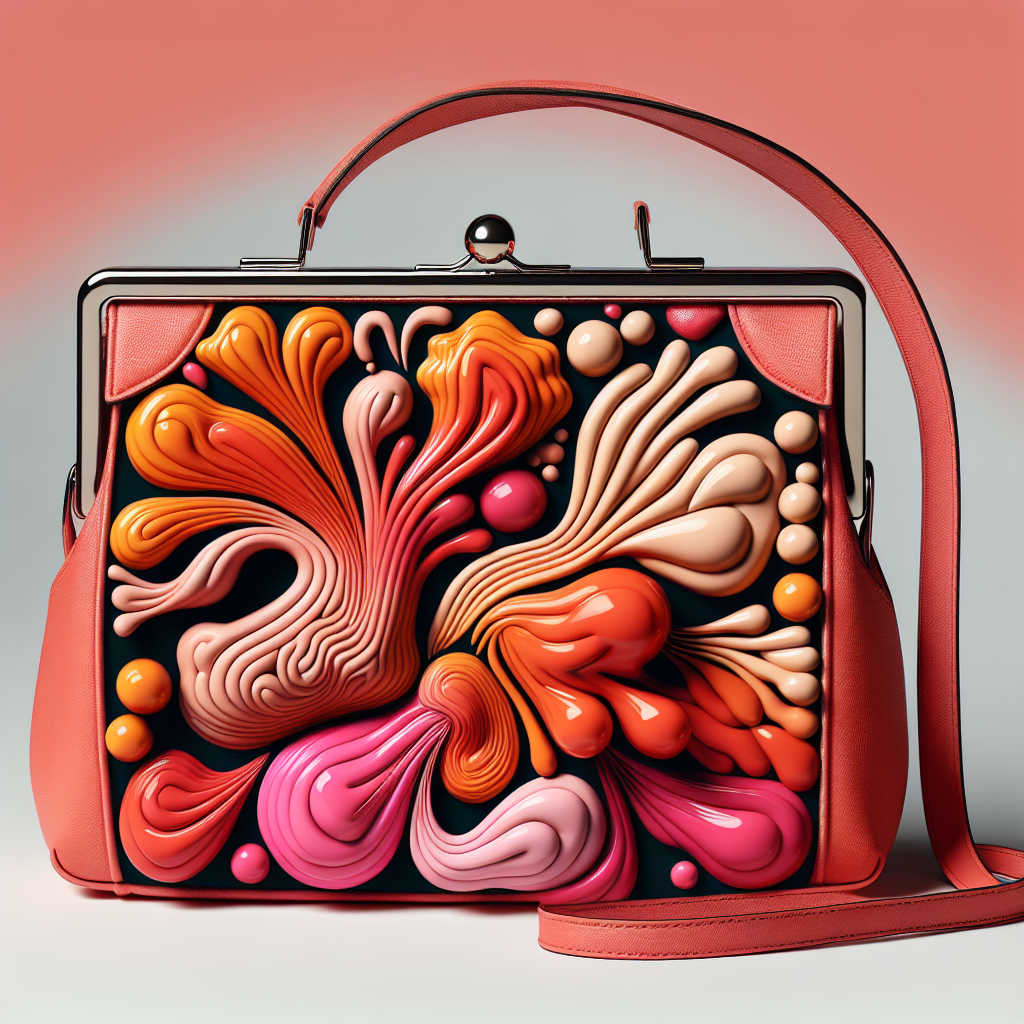

In [22]:
import os
from openai import OpenAI
import requests
import io
from PIL import Image

from dotenv import load_dotenv, find_dotenv
_ = load_dotenv(find_dotenv()) # read local .env file

client = OpenAI(
  api_key=os.environ['OPENAI_API_KEY'],  # this is also the default, it can be omitted
)

response = client.images.generate(
  model="dall-e-3",
  prompt="a pink purse with orange organic shapes",
  size="1024x1024",
  quality="standard",
  n=1,
)

image_url = response.data[0].url
image_response = requests.get(image_url)
generated_image = Image.open(io.BytesIO(image_response.content))
generated_image

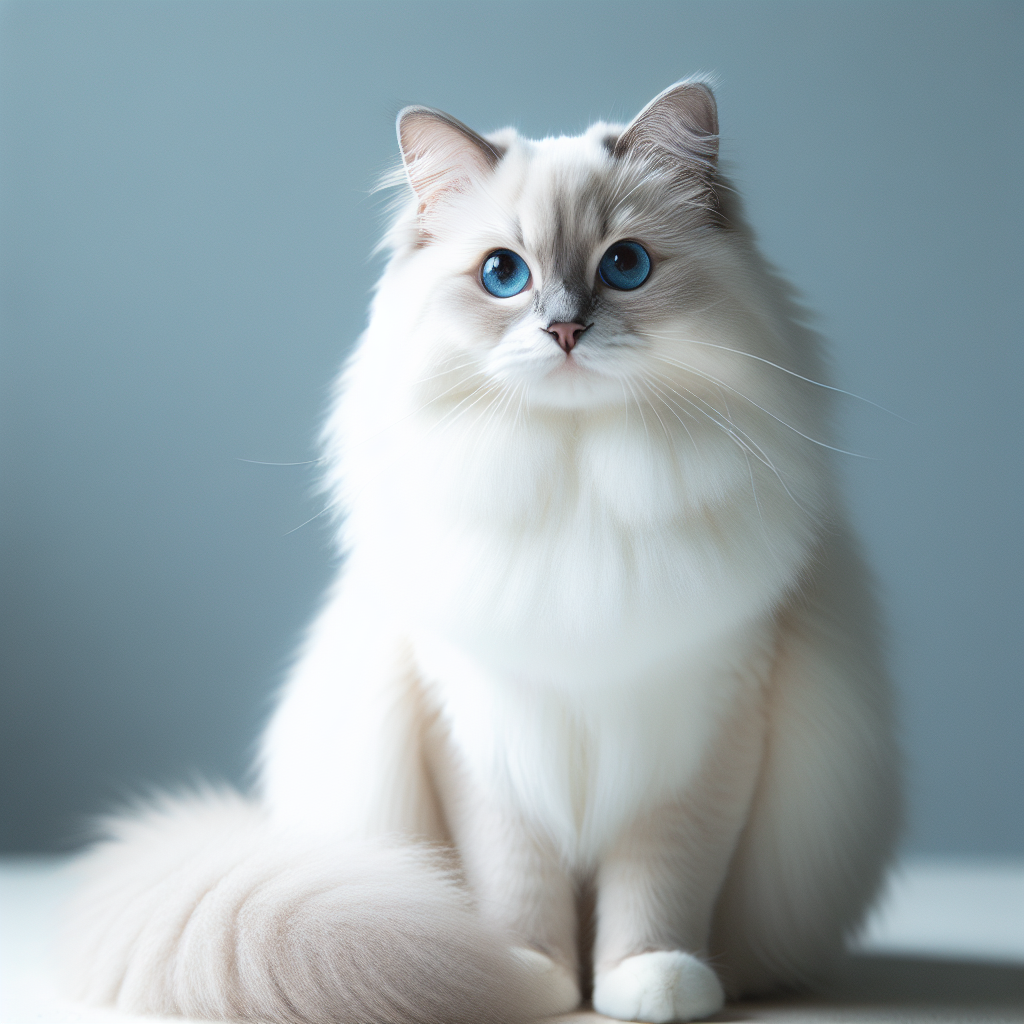

In [6]:
generated_image


In [4]:
!pip install -U weaviate-client

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.5/324.5 kB 4.0 MB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 223.7/223.7 kB 18.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 29.3 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 404.0/404.0 kB 26.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 36.7 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: protobuf
    Found existing installation: protobuf 4.25.3
    Uninstalling protobuf-4.25.3:
      Successfully uninstalled protobuf-4.25.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.16.1 requires protobuf!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<5.0.0dev,>=3.20.3, but you have protobuf 5.26.1 which is incompatible.


In [29]:
import torch
import clip
import cv2
import numpy as np
from PIL import Image
from torchvision import transforms
import urllib.request

device = torch.device('mps')
# Load CLIP model
def load_clip_model(device):
    model, preprocess = clip.load("ViT-B/32", device=device)
    return model, preprocess

# Download U2-Net model weights if not available
def download_u2net_weights():
    url = "https://drive.google.com/uc?export=download&id=1rbSTGKAE-MTxBYHd-51l2hMOQPT_7EPy"
    urllib.request.urlretrieve(url, "u2net.pth")

# Load U2-Net model
def load_u2net_model(device):
    u2net_model = torch.hub.load("xuebinqin/U-2-Net", "u2net")
    if not os.path.exists("u2net.pth"):
        download_u2net_weights()
    u2net_model.load_state_dict(torch.load("u2net.pth", map_location=device))
    u2net_model.to(device)
    u2net_model.eval()
    return u2net_model

# Apply segmentation using U2-Net
def apply_segmentation(image, model, device):
    transform = transforms.Compose([
        transforms.Resize((320, 320)),
        transforms.ToTensor()
    ])
    image_tensor = transform(image).unsqueeze(0).to(device)
    with torch.no_grad():
        prediction = model(image_tensor)[0]
    mask = prediction.squeeze().cpu().numpy()
    mask = (mask > 0.5).astype(np.uint8) * 255
    return mask

# Change color of a segmented area
def change_color(image, mask, new_color):
    colored_image = image.copy()
    colored_image[mask != 0] = new_color
    return colored_image

# Main function to process the image
def process_image(image_path, text_prompt, selected_color, clip_model, preprocess, u2net_model, device):
    # Load and preprocess the image
    image = Image.open(image_path)
    image_tensor = preprocess(image).unsqueeze(0).to(device)

    # Encode the text prompt
    text_tensor = clip.tokenize([text_prompt]).to(device)

    # Get the CLIP features
    with torch.no_grad():
        image_features = clip_model.encode_image(image_tensor)
        text_features = clip_model.encode_text(text_tensor)

    # Calculate similarity
    similarity = torch.nn.functional.cosine_similarity(image_features, text_features)
    print(f"Similarity score: {similarity.item()}")

    # Apply segmentation
    mask = apply_segmentation(image, u2net_model, device)

    # Convert image to BGR for OpenCV
    image_bgr = cv2.cvtColor(np.array(image), cv2.COLOR_RGB2BGR)

    # Change the color of the segmented area
    new_colored_image = change_color(image_bgr, mask, selected_color)

    # Display the result
    cv2.imshow("Original Image", image_bgr)
    cv2.imshow("Color Changed Image", new_colored_image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

# Main entry point
def main(image_path, text_prompt, selected_color):
    device = "cuda" if torch.cuda.is_available() else "cpu"
    
    # Load models
    clip_model, preprocess = load_clip_model(device)
    u2net_model = load_u2net_model(device)

    # Process image
    process_image(image_path, text_prompt, selected_color, clip_model, preprocess, u2net_model, device)

if __name__ == "__main__":
    image_path = '/Users/fredbone/Library/Mobile Documents/com~apple~CloudDocs/Maketribe/images/handbag_yellow.jpeg'
    text_prompt = "a bag"  # Adjust this based on what you want to identify
    selected_color = [0, 0, 255]  # BGR color for red
    main(image_path, text_prompt, selected_color)


Using cache found in /Users/fredbone/.cache/torch/hub/xuebinqin_U-2-Net_master


FileNotFoundError: [Errno 2] No such file or directory: '/Users/fredbone/.cache/torch/hub/xuebinqin_U-2-Net_master/hubconf.py'

In [26]:
import os
os.listdir('/Users/fredbone/Library/Mobile Documents/com~apple~CloudDocs/Maketribe/images')

['handbag_yellow.jpeg',
 'output_image.png',
 'pink_handbag.png',
 'download.png',
 '.DS_Store',
 'handbag_brown.jpeg',
 'woman_bag.png',
 'red_leaves.png']

In [ ]:
'/Users/fredbone/Library/Mobile Documents/com~apple~CloudDocs/Maketribe/images/handbag_yellow.jpeg'

In [28]:
!pip install u2net


ERROR: Could not find a version that satisfies the requirement u2net (from versions: none)
ERROR: No matching distribution found for u2net


In [30]:
import torch
import clip
import cv2
import numpy as np
from PIL import Image
from torchvision import transforms
import urllib.request
import os
device = torch.device('mps')

# Define U-2-Net model structure (simplified version)
class U2NET(torch.nn.Module):
    def __init__(self, *args, **kwargs):
        super(U2NET, self).__init__()
        # Add model layers and initialization here
        # This is a placeholder for the actual model structure
        pass
    
    def forward(self, x):
        # Define forward pass here
        return x

def load_u2net_model(device):
    model = U2NET()
    model.load_state_dict(torch.load("u2net.pth", map_location=device))
    model.to(device)
    model.eval()
    return model

# Load CLIP model
def load_clip_model(device):
    model, preprocess = clip.load("ViT-B/32", device=device)
    return model, preprocess

# Apply segmentation using U-2-Net
def apply_segmentation(image, model, device):
    transform = transforms.Compose([
        transforms.Resize((320, 320)),
        transforms.ToTensor()
    ])
    image_tensor = transform(image).unsqueeze(0).to(device)
    with torch.no_grad():
        prediction = model(image_tensor)
    mask = prediction.squeeze().cpu().numpy()
    mask = (mask > 0.5).astype(np.uint8) * 255
    return mask

# Change color of a segmented area
def change_color(image, mask, new_color):
    colored_image = image.copy()
    colored_image[mask != 0] = new_color
    return colored_image

# Main function to process the image
def process_image(image_path, text_prompt, selected_color, clip_model, preprocess, u2net_model, device):
    # Load and preprocess the image
    image = Image.open(image_path)
    image_tensor = preprocess(image).unsqueeze(0).to(device)

    # Encode the text prompt
    text_tensor = clip.tokenize([text_prompt]).to(device)

    # Get the CLIP features
    with torch.no_grad():
        image_features = clip_model.encode_image(image_tensor)
        text_features = clip_model.encode_text(text_tensor)

    # Calculate similarity
    similarity = torch.nn.functional.cosine_similarity(image_features, text_features)
    print(f"Similarity score: {similarity.item()}")

    # Apply segmentation
    mask = apply_segmentation(image, u2net_model, device)

    # Convert image to BGR for OpenCV
    image_bgr = cv2.cvtColor(np.array(image), cv2.COLOR_RGB2BGR)

    # Change the color of the segmented area
    new_colored_image = change_color(image_bgr, mask, selected_color)

    # Display the result
    cv2.imshow("Original Image", image_bgr)
    cv2.imshow("Color Changed Image", new_colored_image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

# Main entry point
def main(image_path, text_prompt, selected_color):
    device = "cuda" if torch.cuda.is_available() else "cpu"
    
    # Load models
    clip_model, preprocess = load_clip_model(device)
    u2net_model = load_u2net_model(device)

    # Process image
    process_image(image_path, text_prompt, selected_color, clip_model, preprocess, u2net_model, device)

if __name__ == "__main__":
    image_path = '/Users/fredbone/Library/Mobile Documents/com~apple~CloudDocs/Maketribe/images/handbag_yellow.jpeg'
    text_prompt = "a yellow bag"  # Adjust this based on what you want to identify
    selected_color = [0, 0, 255]  # BGR color for red
    main(image_path, text_prompt, selected_color)


FileNotFoundError: [Errno 2] No such file or directory: 'u2net.pth'